In [1]:
import numpy as np
import pandas as pd
import itertools

In [2]:
df=pd.read_excel('Toronto_Restaurants.xlsx')

In [3]:
df.shape

(3929, 8)

In [4]:
df.head()

,address,categories,city,name,stars,cuisine,website,cost
0,1170 Queen Street W,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,Bolt Fresh Bar,3.0,Dessert,https://www.boltfreshbar.com,2
1,1051 Bloor Street W,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,The Steady Cafe & Bar,3.5,Breakfast & Brunch,NaN,2
2,582 College Street,"Restaurants, Breakfast & Brunch, Bars, Modern ...",Toronto,Mad Crush Wine Bar,4.0,Breakfast & Brunch,NaN,3
3,1614 Queen Street E,"Tex-Mex, Mexican, Restaurants",Toronto,Burrito Bandidos,3.5,Mexican,www.burritobandidos.com,1
4,165 East Liberty Street,"Middle Eastern, Restaurants, Salad, Breakfast ...",Toronto,Paramount Fine Foods,2.0,Mediterranean,https://www.paramountfinefoods.com,2


In [5]:
df.groupby('cuisine').count()

,address,categories,city,name,stars,website,cost
cuisine,,,,,,,
Breakfast & Brunch,400,400,400,400,400,206,400
Canadian,606,606,606,606,606,284,606
Chinese,368,368,368,368,368,116,368
Dessert,224,224,224,224,224,121,224
European,591,591,591,591,591,330,591
Indian,238,238,238,238,238,120,238
Japan,597,597,597,597,597,282,597
Mediterranean,413,413,413,413,413,189,413
Mexican,236,236,236,236,236,139,236


In [6]:
X=df.iloc[:,[5,7]].values
X_train=X.copy()
X

array([['Dessert', 2],
       ['Breakfast & Brunch', 2],
       ['Breakfast & Brunch', 3],
       ...,
       ['Breakfast & Brunch', 2],
       ['Japan', 3],
       ['Thai', 2]], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X_train[:, 0] = labelencoder_X.fit_transform(X_train[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X_train = onehotencoder.fit_transform(X_train).toarray()
X_train

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0., 0., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 3.],
       ...,
       [1., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 1., 2.]])

In [8]:
X

array([['Dessert', 2],
       ['Breakfast & Brunch', 2],
       ['Breakfast & Brunch', 3],
       ...,
       ['Breakfast & Brunch', 2],
       ['Japan', 3],
       ['Thai', 2]], dtype=object)

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
wcss = []
for i in range(1, 32):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,32), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset




C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (31). Possibly due to duplicate points in X.
  return_n_iter=True)


<Figure size 640x480 with 1 Axes>

In [10]:
kmeans = KMeans(n_clusters = 30, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (29) found smaller than n_clusters (30). Possibly due to duplicate points in X.
  return_n_iter=True)


In [11]:
def plotscatter(X,y_kmeans,n):
    colors = itertools.cycle(["r", "b", "g","c","m","y","k","pink","indigo","olive","tomato","lime"])
    cmap = mpl.cm.autumn
    for i in range(0,n):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, color=next(colors))
    plt.rcParams["figure.figsize"] = 16,6
    plt.title('Clusters of restaurants')
    plt.xlabel('Cuisine Type ')
    plt.ylabel('Cost($) ')
    plt.legend()
    plt.show()
    #fig_size = plt.rcParams["figure.figsize"]
    
    return

No handles with labels found to put in legend.


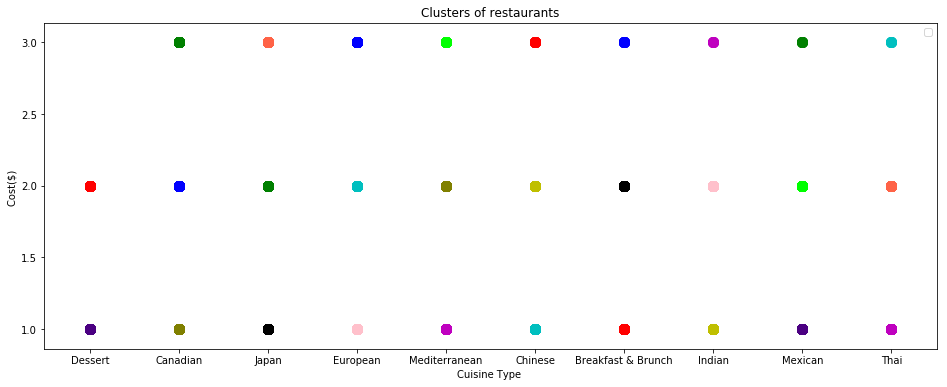

In [13]:
plotscatter(X,y_kmeans,30)

In [14]:
dfd=pd.DataFrame({"Cluster ID":y_kmeans})
dfa=pd.concat([dfd, df],axis=1, sort=False)
dfa.head()

,Cluster ID,address,categories,city,name,stars,cuisine,website,cost
0,0,1170 Queen Street W,"Juice Bars & Smoothies, Food, Restaurants, Fas...",Toronto,Bolt Fresh Bar,3.0,Dessert,https://www.boltfreshbar.com,2
1,6,1051 Bloor Street W,"Restaurants, Nightlife, Breakfast & Brunch, Ve...",Toronto,The Steady Cafe & Bar,3.5,Breakfast & Brunch,NaN,2
2,25,582 College Street,"Restaurants, Breakfast & Brunch, Bars, Modern ...",Toronto,Mad Crush Wine Bar,4.0,Breakfast & Brunch,NaN,3
3,8,1614 Queen Street E,"Tex-Mex, Mexican, Restaurants",Toronto,Burrito Bandidos,3.5,Mexican,www.burritobandidos.com,1
4,9,165 East Liberty Street,"Middle Eastern, Restaurants, Salad, Breakfast ...",Toronto,Paramount Fine Foods,2.0,Mediterranean,https://www.paramountfinefoods.com,2


In [15]:
dfa["Cluster ID"].unique()

array([ 0,  6, 25,  8,  9,  2,  3, 11,  5, 10,  1, 13, 22, 14, 15,  7, 21,
       12, 16,  4, 18, 24, 17, 19, 28, 20, 23, 27, 26], dtype=int64)

In [17]:
#Testing with random selection
Xt=np.array([["Japan",2.6]])

In [18]:
Xt[:,0] = labelencoder_X.transform(Xt[:,0])
print(Xt)
Xt = onehotencoder.transform(Xt).toarray()

[['6' '2.6']]


In [19]:
def cluster_predict(Xt):
    #Y = vectorizer.transform(list(str_input))
    prediction = kmeans.predict(Xt)
    return prediction

In [20]:
pred=cluster_predict(Xt)
pred=int(pred)
out=dfa.loc[dfa["Cluster ID"]==pred]
out.head()

,Cluster ID,address,categories,city,name,stars,cuisine,website,cost
32,22,"2035 Kennedy Road, 14th Floor","Japanese, Restaurants",Toronto,Sagano,3.0,Japan,NaN,3
438,22,655 Bay Street,"Japanese, Asian Fusion, Sushi Bars, Restaurants",Toronto,KaKa All You Can Eat,3.5,Japan,kakaallyoucaneat.ca,3
539,22,181 Bay Street,"Japanese, Restaurants, Sushi Bars",Toronto,Ki Modern Japanese + Bar,3.5,Japan,www.kijapanese.com,3
569,22,236 Adelaide Street W,"Restaurants, Sushi Bars, Japanese",Toronto,Yuzu No Hana,4.0,Japan,www.yuzunohana.ca,3
671,22,42 Gristmill Lane,"Restaurants, Seafood, Sushi Bars, Ramen, Japanese",Toronto,Boku Sushi,3.5,Japan,NaN,3


In [21]:
random_subset = out.sample(n=5)
random_subset.head()
random_subset['name'].values

array(['Japan Eats', 'Momo San', 'Hibachi Teppanyaki & Bar',
       'Blowfish Restaurant & Sake Bar', 'Kaga By Ginza'], dtype=object)

In [22]:
from flask import Flask,render_template,url_for,request
import pandas as pd 
import pickle
import requests
from bs4 import BeautifulSoup

In [27]:
app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html')


@app.route('/recommend',methods=['POST'])
def recommend():
    if request.method == 'POST':
        option = request.form['cuisine']
        
        cost=request.form['cost']
       
        Xt=np.array([[option,cost]])
        Xt[:,0] = labelencoder_X.transform(Xt[:,0])
       
        #onehotencoder = OneHotEncoder(categorical_features = [0])
        Xt = onehotencoder.transform(Xt).toarray()
       
        pred=cluster_predict(Xt)
        pred=int(pred)
        out=dfa.loc[dfa["Cluster ID"]==pred]
        random_subset = out.sample(n=5)
        name=random_subset['name'].values
        website=random_subset['website'].values
        address=random_subset['address'].values
        to_pass=[]
        for n in range(0,len(name)):
            lst=[name[n],address[n],website[n]]
            to_pass.append(lst)
       # link=random_subset["6"]
        print(to_pass)
    return render_template('Recommendation.html',myData=to_pass)

In [ ]:
if __name__ == '__main__':
    #app.run(host='0.0.0.0',port=8080)
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Feb/2020 23:09:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Feb/2020 23:09:18] "POST /recommend HTTP/1.1" 200 -


[['Tamarind - The Indian Kitchen', '161 Bay Street, Unit 230', nan], ['Empire Grill', '1100 Eglinton Avenue W', nan], ['Chef Of India', '1415 Yonge Street', 'chefofindia.ca'], ['Bombay Palace', '71 Jarvis Street', 'www.bombaypalacetoronto.com'], ['Savera Indian Cuisine', '815 Saint Clair Avenue W', nan]]
